In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
data = pd.read_csv('feature_extract.csv')
np.random.seed(0)

In [28]:
data.columns

Index(['Artist', 'Title', 'Label', 'Path', 'Chorus_Path',
       'extracted_chorus_path', 'chroma_stft_kew_0', 'chroma_stft_min_0',
       'chroma_stft_max_0', 'chroma_stft_std_0',
       ...
       'tonnetz_mean_5', 'tonnetz_median_5', 'tonnetz_kurtosis_5',
       'zero_crossing_rate_kew_0', 'zero_crossing_rate_min_0',
       'zero_crossing_rate_max_0', 'zero_crossing_rate_std_0',
       'zero_crossing_rate_mean_0', 'zero_crossing_rate_median_0',
       'zero_crossing_rate_kurtosis_0'],
      dtype='object', length=524)

In [29]:
data.tail()

,Artist,Title,Label,Path,Chorus_Path,extracted_chorus_path,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
790,Ne-Yo,Do You,0,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/Do You - Ne-Yo.wav,0.649463,0.000000,1.0,0.316835,...,-0.025344,-0.025509,1.378500,1.289102,0.033016,0.303900,0.027651,0.096831,0.094558,5.633785
791,Avril Lavigne,When You're Gone,0,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/When You're Gone - Avril Lavign...,1.357484,0.001466,1.0,0.267491,...,0.009152,0.005985,0.361181,3.448056,0.027120,0.538277,0.047306,0.116857,0.119138,27.333917
792,Gwen Stefani,4 In The Morning,0,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/4 In The Morning - Gwen Stefani...,0.520500,0.000000,1.0,0.344282,...,0.008184,-0.005062,1.474136,0.772716,0.000000,0.279184,0.036193,0.105221,0.102313,2.393584
793,Beyonce,Get Me Bodied,0,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/Get Me Bodied - Beyonce.wav,0.865777,0.000000,1.0,0.272817,...,0.008661,-0.000451,1.255475,0.859274,0.021088,0.393424,0.059574,0.118995,0.111610,1.050555
794,Kanye West,Can't Tell Me Nothing,0,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/Can't Tell Me Nothing - Kanye W...,0.898675,0.000000,1.0,0.306946,...,0.031365,-0.004331,-0.324572,1.179204,0.000000,0.219365,0.026547,0.076339,0.072245,2.490452


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Columns: 524 entries, Artist to zero_crossing_rate_kurtosis_0
dtypes: float64(518), int64(1), object(5)
memory usage: 3.2+ MB


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Label,795.0,0.504403,0.500295,0.000000,0.000000,1.000000,1.000000,1.000000
chroma_stft_kew_0,795.0,0.728195,0.421839,-0.600634,0.439296,0.704330,1.004872,2.349722
chroma_stft_min_0,795.0,0.000345,0.001356,0.000000,0.000000,0.000000,0.000000,0.014061
chroma_stft_max_0,795.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
chroma_stft_std_0,795.0,0.296397,0.041839,0.177962,0.266708,0.300283,0.327188,0.405580
...,...,...,...,...,...,...,...,...
zero_crossing_rate_max_0,795.0,0.301909,0.113488,0.077642,0.223084,0.275011,0.352313,0.829070
zero_crossing_rate_std_0,795.0,0.040236,0.012351,0.015613,0.031867,0.038278,0.046929,0.125738
zero_crossing_rate_mean_0,795.0,0.095162,0.026437,0.025403,0.076337,0.094105,0.112548,0.186644
zero_crossing_rate_median_0,795.0,0.091651,0.028884,0.020862,0.071440,0.091066,0.110181,0.185261


In [32]:
data['chroma_cens_kew_10'].dtype

dtype('float64')

### Artists with the most unpopular songs

In [33]:
unpopular_chart = data[data['Label'] == 0].Artist.value_counts()
unpopular_chart

Taylor Swift        25
Carrie Underwood    22
Justin Bieber       21
Drake               18
Juice WRLD          17
                    ..
Meghan Trainor       1
Coldplay             1
Shawn Mendes         1
Iggy Azalea          1
Mary J. Blige        1
Name: Artist, Length: 70, dtype: int64

### Artists with the most popular songs

In [34]:
popular_chart = data[data['Label'] == 1].Artist.value_counts()
popular_chart

Taylor Swift        19
Drake               18
Rihanna             17
P!nk                13
Katy Perry          11
                    ..
Fetty Wap            1
Camila Cabello       1
LMFAO                1
The Chainsmokers     1
T-Pain               1
Name: Artist, Length: 77, dtype: int64

### Plotting the total count of popular songs against the unpopular songs

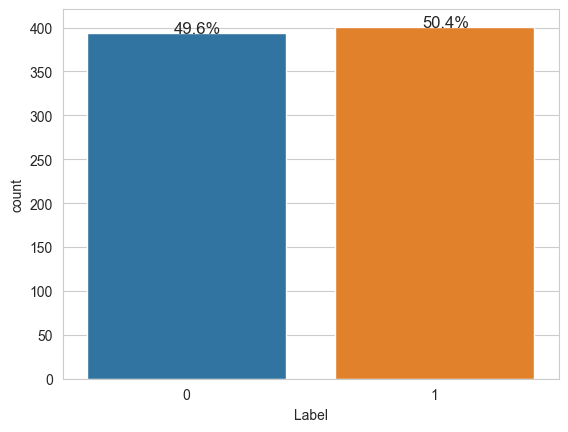

In [35]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
        

sns.set_style('whitegrid')
ax= sns.countplot(x = 'Label', data = data)
without_hue(ax,data['Label'])


### Box Plot to Detect Outliers

In [36]:
def plot_boxplot(data, ft):
  data.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

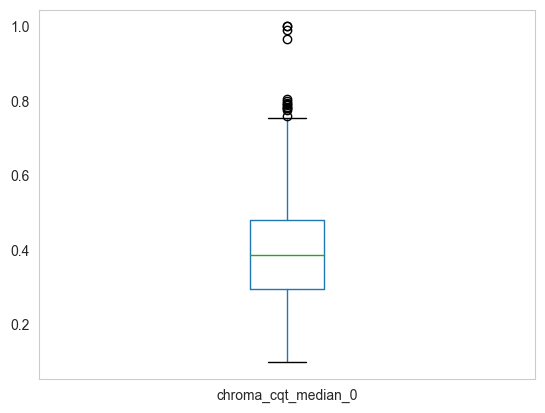

In [37]:
plot_boxplot(data, "chroma_cqt_median_0") 

In [38]:
median_features = data[["chroma_stft_median_0", "chroma_cqt_median_0", "chroma_cens_median_0", "mfcc_median_0", "rms_median_0", "spectral_centroid_median_0",
        "spectral_bandwidth_median_0", "spectral_contrast_median_0", "spectral_rolloff_median_0", "tonnetz_median_0", "zero_crossing_rate_median_0"]]

Inter Quartile Range or IQR for short is an alternative technique that is used to detect and remove outliers. The formula for IQR is very simple. IQR = Q3-Q1. Where Q3 is 75th percentile and Q1 is 25th percentile. Once you have IQR you can find upper and lower limit by applying this formula, lower_limit = Q1-1.5IQR upper_limit = Q3 +1.5IQR, anything less than the lower limit or above the upper limit is considered an outlier.

In [39]:
def outliers(data, ft):
  Q1 = data[ft].quantile(0.25)
  Q3 = data[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = data[(data[ft] < lower_bound) | (data[ft] > upper_bound)]
  return ls

In [40]:
index_list = []
for feature in median_features:
  index_list.extend(outliers(data,feature))

### Outliers Detected

In [41]:
index_list

['Artist',
 'Title',
 'Label',
 'Path',
 'Chorus_Path',
 'extracted_chorus_path',
 'chroma_stft_kew_0',
 'chroma_stft_min_0',
 'chroma_stft_max_0',
 'chroma_stft_std_0',
 'chroma_stft_mean_0',
 'chroma_stft_median_0',
 'chroma_stft_kurtosis_0',
 'chroma_stft_kew_1',
 'chroma_stft_min_1',
 'chroma_stft_max_1',
 'chroma_stft_std_1',
 'chroma_stft_mean_1',
 'chroma_stft_median_1',
 'chroma_stft_kurtosis_1',
 'chroma_stft_kew_2',
 'chroma_stft_min_2',
 'chroma_stft_max_2',
 'chroma_stft_std_2',
 'chroma_stft_mean_2',
 'chroma_stft_median_2',
 'chroma_stft_kurtosis_2',
 'chroma_stft_kew_3',
 'chroma_stft_min_3',
 'chroma_stft_max_3',
 'chroma_stft_std_3',
 'chroma_stft_mean_3',
 'chroma_stft_median_3',
 'chroma_stft_kurtosis_3',
 'chroma_stft_kew_4',
 'chroma_stft_min_4',
 'chroma_stft_max_4',
 'chroma_stft_std_4',
 'chroma_stft_mean_4',
 'chroma_stft_median_4',
 'chroma_stft_kurtosis_4',
 'chroma_stft_kew_5',
 'chroma_stft_min_5',
 'chroma_stft_max_5',
 'chroma_stft_std_5',
 'chroma_stft_m

### Dropping the Outliers

In [42]:
def remove(data,ls):
  ls = sorted(set(ls))
  data2 = data.drop(ls)
  return data2

<AxesSubplot:xlabel='chroma_stft_std_0'>

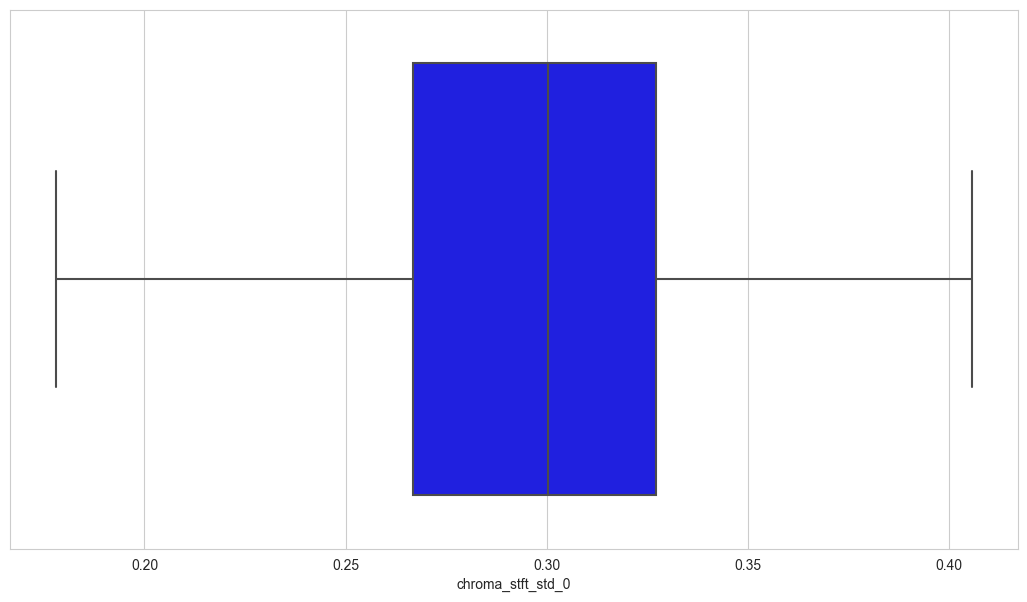

In [43]:
plt.figure(figsize=(13,7))
sns.boxplot(x=data['chroma_stft_std_0'], color='blue')

### Pair Plots of the Median Values of All the Major Audio Features

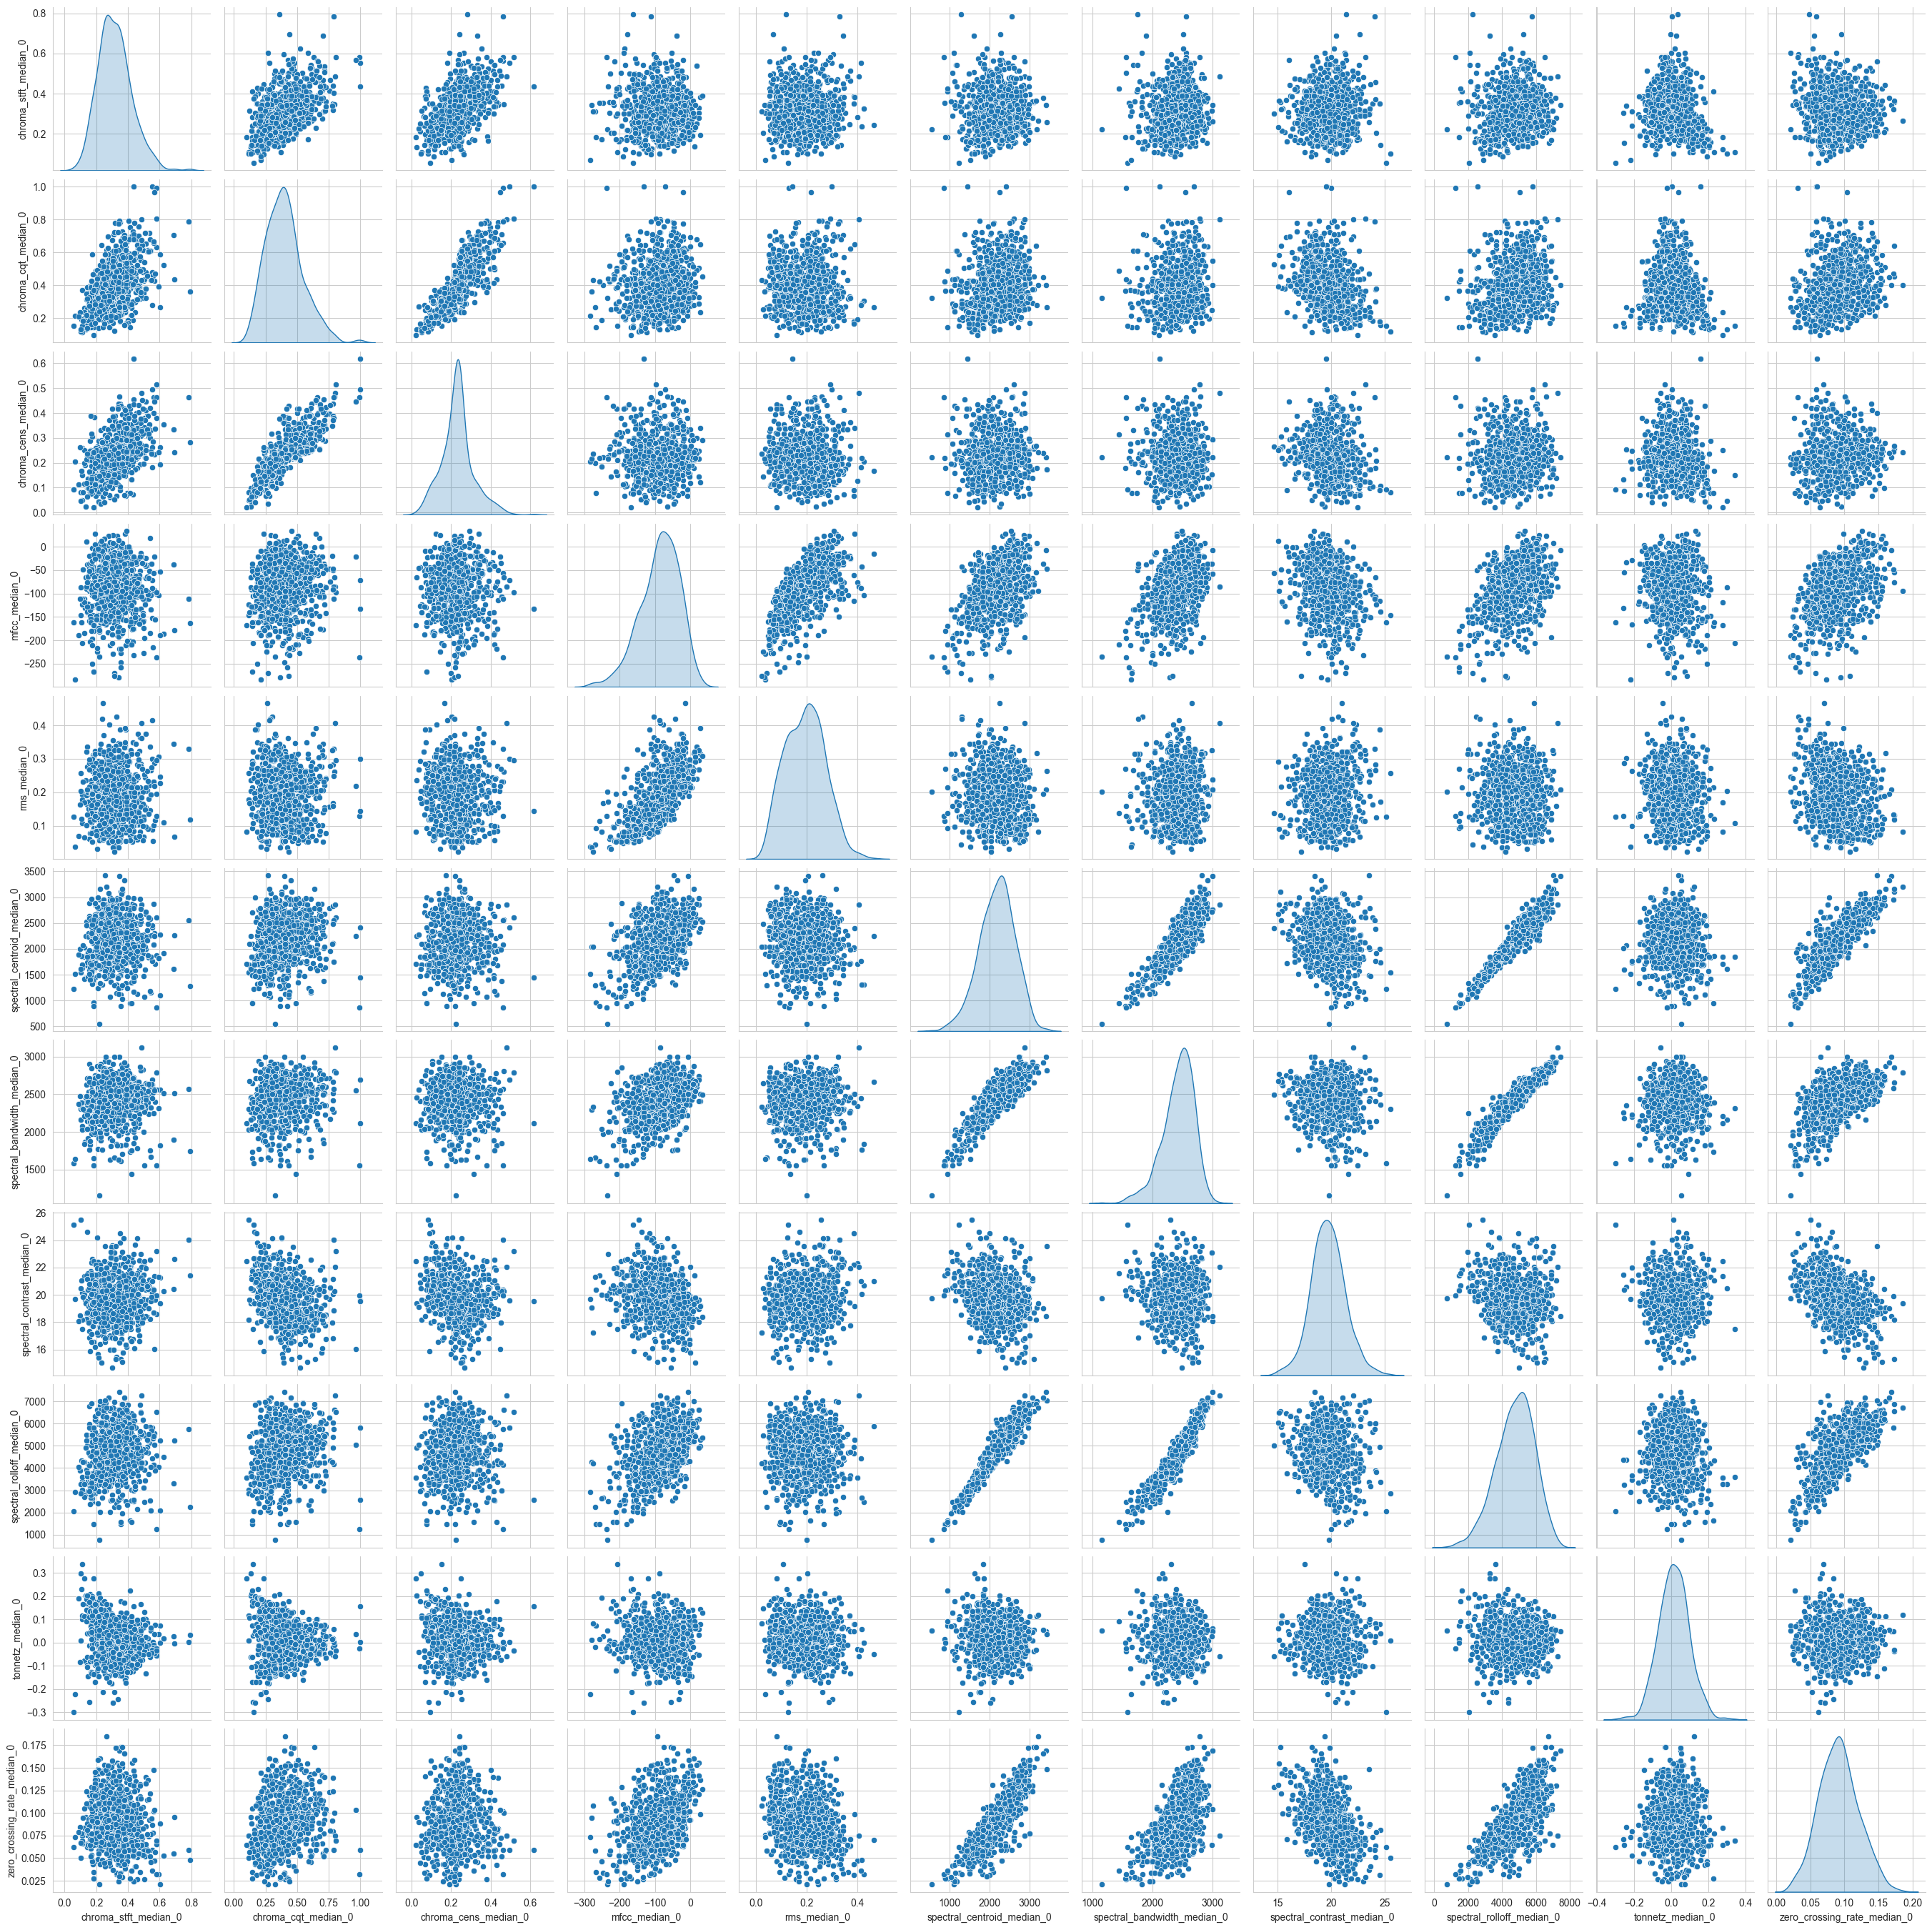

In [44]:
sns.pairplot(median_features, diag_kind = 'kde')

### Pearson Correlation or Default Correlation between median features

In [45]:
median_features.corr()

,chroma_stft_median_0,chroma_cqt_median_0,chroma_cens_median_0,mfcc_median_0,rms_median_0,spectral_centroid_median_0,spectral_bandwidth_median_0,spectral_contrast_median_0,spectral_rolloff_median_0,tonnetz_median_0,zero_crossing_rate_median_0
chroma_stft_median_0,1.000000,0.525812,0.527209,-0.037708,0.050140,0.040593,0.079853,0.080813,0.091544,-0.178000,-0.090935
chroma_cqt_median_0,0.525812,1.000000,0.842954,0.111477,-0.030125,0.179721,0.151299,-0.308178,0.189455,-0.099118,0.212961
chroma_cens_median_0,0.527209,0.842954,1.000000,0.018619,-0.018962,0.012718,0.010391,-0.160032,0.030471,-0.104908,0.049224
mfcc_median_0,-0.037708,0.111477,0.018619,1.000000,0.662865,0.479702,0.422607,-0.250251,0.453517,-0.077474,0.431224
rms_median_0,0.050140,-0.030125,-0.018962,0.662865,1.000000,-0.075393,0.048893,0.139634,-0.001480,-0.063712,-0.238200
spectral_centroid_median_0,0.040593,0.179721,0.012718,0.479702,-0.075393,1.000000,0.874668,-0.261332,0.951557,-0.042954,0.855850
spectral_bandwidth_median_0,0.079853,0.151299,0.010391,0.422607,0.048893,0.874668,1.000000,-0.131045,0.944102,-0.021978,0.589616
spectral_contrast_median_0,0.080813,-0.308178,-0.160032,-0.250251,0.139634,-0.261332,-0.131045,1.000000,-0.191711,-0.008446,-0.457241
spectral_rolloff_median_0,0.091544,0.189455,0.030471,0.453517,-0.001480,0.951557,0.944102,-0.191711,1.000000,-0.055776,0.719088
tonnetz_median_0,-0.178000,-0.099118,-0.104908,-0.077474,-0.063712,-0.042954,-0.021978,-0.008446,-0.055776,1.000000,-0.001712


### Plotting directions of relationships and it's strengths between all median features

<AxesSubplot:>

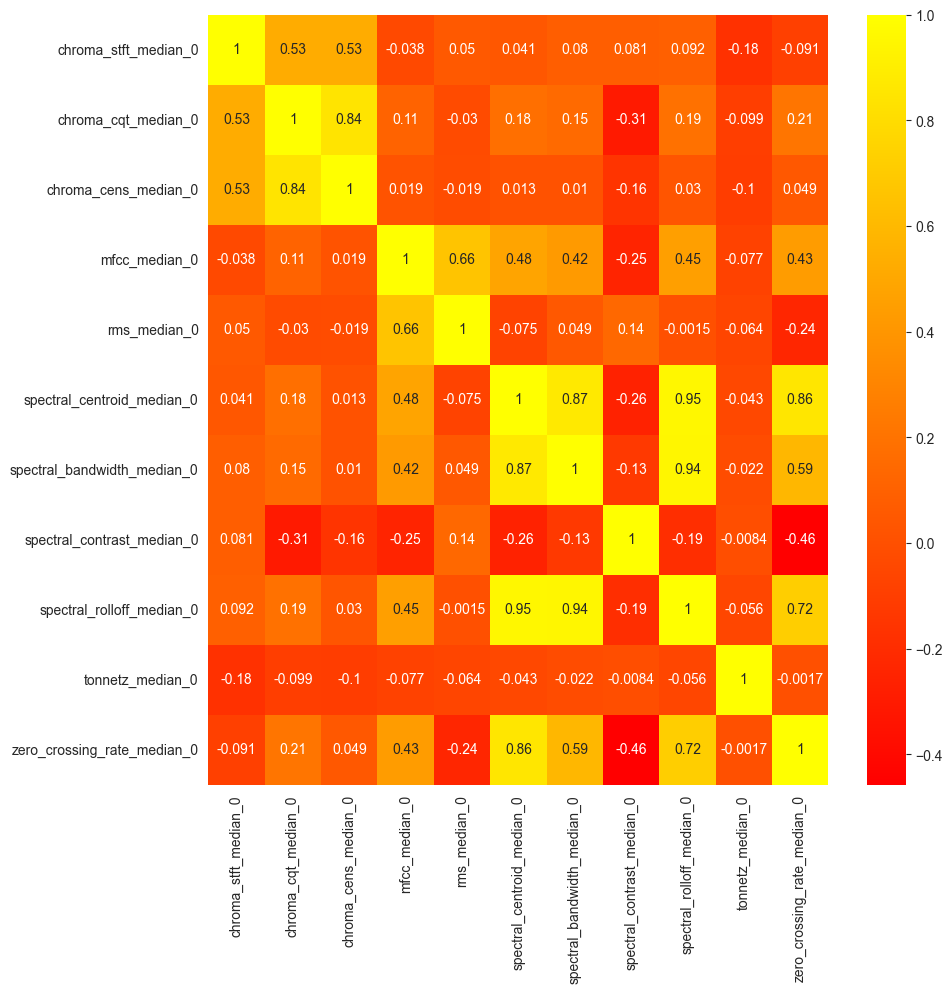

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(median_features.corr(), annot=True, cmap='autumn')

Observation : positive relations between (1. spectral_centroid_median_0 and spectral_rollof_median_0 , 2. spectral_bandwidth_median_0 and spectral_rollof_median_0) with 0.95 and 94 respectively AND negative correlation between (spectral_contrast_median_0 and zero_crossing_rate_median_0) with -0.46


### Checking if there are any missing values

In [51]:
missing_values = data.isnull().sum()
total_cells = np.product(data.shape)
total_missing = missing_values.sum()
total_missing
data

,Artist,Title,Label,Path,Chorus_Path,extracted_chorus_path,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,The Weeknd,Blinding Lights,1,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/Blinding Lights - The Weeknd.wav,0.325105,0.000000,1.0,0.318647,...,0.009015,0.001993,0.683537,0.120783,0.000000,0.185714,0.031305,0.075716,0.076916,0.640352
1,Olivia Rodrigo,Good 4 U,1,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/Good 4 U - Olivia Rodrigo.wav,1.020729,0.000000,1.0,0.267815,...,-0.001283,-0.001245,2.368123,-0.139140,0.000000,0.274331,0.042506,0.089507,0.096644,0.533097
2,Olivia Rodrigo,Drivers License,1,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/Drivers License - Olivia Rodrig...,1.408063,0.000000,1.0,0.297368,...,-0.014449,-0.014515,0.351270,1.100266,0.000000,0.248435,0.030082,0.069129,0.065079,3.259196
3,Lil Nas X,Montero (Call Me By Your Name),1,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/Montero (Call Me By Your Name) ...,0.995654,0.000000,1.0,0.252682,...,-0.001599,-0.007845,0.446242,0.525206,0.000000,0.362494,0.052102,0.114976,0.109138,0.934361
4,BTS,Butter,1,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/Butter - BTS.wav,0.314336,0.000000,1.0,0.340640,...,0.004915,0.003381,4.878381,0.268373,0.000000,0.250340,0.044437,0.092644,0.090476,1.093109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,Ne-Yo,Do You,0,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/Do You - Ne-Yo.wav,0.649463,0.000000,1.0,0.316835,...,-0.025344,-0.025509,1.378500,1.289102,0.033016,0.303900,0.027651,0.096831,0.094558,5.633785
791,Avril Lavigne,When You're Gone,0,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/When You're Gone - Avril Lavign...,1.357484,0.001466,1.0,0.267491,...,0.009152,0.005985,0.361181,3.448056,0.027120,0.538277,0.047306,0.116857,0.119138,27.333917
792,Gwen Stefani,4 In The Morning,0,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/4 In The Morning - Gwen Stefani...,0.520500,0.000000,1.0,0.344282,...,0.008184,-0.005062,1.474136,0.772716,0.000000,0.279184,0.036193,0.105221,0.102313,2.393584
793,Beyonce,Get Me Bodied,0,/home/yamen/Projects/Technocolabs/sample_data/...,/home/yamen/Projects/Technocolabs/Chorus//home...,Extract_Chorus/Get Me Bodied - Beyonce.wav,0.865777,0.000000,1.0,0.272817,...,0.008661,-0.000451,1.255475,0.859274,0.021088,0.393424,0.059574,0.118995,0.111610,1.050555


In [52]:
data1 = data.copy()
data1.drop(data1.columns[0:6],axis = 1, inplace = True)
data1

,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,chroma_stft_kew_1,chroma_stft_min_1,chroma_stft_max_1,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,0.325105,0.000000,1.0,0.318647,0.482954,0.427972,-1.184744,0.603670,0.000000,1.0,...,0.009015,0.001993,0.683537,0.120783,0.000000,0.185714,0.031305,0.075716,0.076916,0.640352
1,1.020729,0.000000,1.0,0.267815,0.339303,0.279227,0.270703,0.687065,0.000000,1.0,...,-0.001283,-0.001245,2.368123,-0.139140,0.000000,0.274331,0.042506,0.089507,0.096644,0.533097
2,1.408063,0.000000,1.0,0.297368,0.257008,0.128317,0.812924,1.373638,0.000000,1.0,...,-0.014449,-0.014515,0.351270,1.100266,0.000000,0.248435,0.030082,0.069129,0.065079,3.259196
3,0.995654,0.000000,1.0,0.252682,0.311545,0.255675,0.407962,0.787342,0.000000,1.0,...,-0.001599,-0.007845,0.446242,0.525206,0.000000,0.362494,0.052102,0.114976,0.109138,0.934361
4,0.314336,0.000000,1.0,0.340640,0.459596,0.394586,-1.262645,0.618538,0.000000,1.0,...,0.004915,0.003381,4.878381,0.268373,0.000000,0.250340,0.044437,0.092644,0.090476,1.093109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0.649463,0.000000,1.0,0.316835,0.404342,0.315489,-0.854431,0.636219,0.000000,1.0,...,-0.025344,-0.025509,1.378500,1.289102,0.033016,0.303900,0.027651,0.096831,0.094558,5.633785
791,1.357484,0.001466,1.0,0.267491,0.282992,0.193882,1.023286,1.142590,0.000649,1.0,...,0.009152,0.005985,0.361181,3.448056,0.027120,0.538277,0.047306,0.116857,0.119138,27.333917
792,0.520500,0.000000,1.0,0.344282,0.443352,0.337619,-1.191924,0.927015,0.000000,1.0,...,0.008184,-0.005062,1.474136,0.772716,0.000000,0.279184,0.036193,0.105221,0.102313,2.393584
793,0.865777,0.000000,1.0,0.272817,0.373551,0.283081,-0.263668,0.884234,0.000000,1.0,...,0.008661,-0.000451,1.255475,0.859274,0.021088,0.393424,0.059574,0.118995,0.111610,1.050555


### Scaling the data so that each feature has a single unit variance

In [53]:
scaler = StandardScaler()

### Finding the principal components using the fit method, then applying rotation and dimensionality reduction by calling transform().


In [54]:
scaler.fit(data1)
scaled_data = scaler.transform(data1)

#### Using Principal Component Analysis(PCA) to reduce the number of variables while maintaining the majority of the important information.

In [56]:
pca = PCA(n_components = 2)

In [57]:
pca.fit(scaled_data)

PCA(n_components=2)

In [58]:
x_pca = pca.transform(scaled_data)

In [59]:
print(scaled_data.shape)
print(x_pca.shape) # Dimensions reduced to 2

(795, 518)
(795, 2)


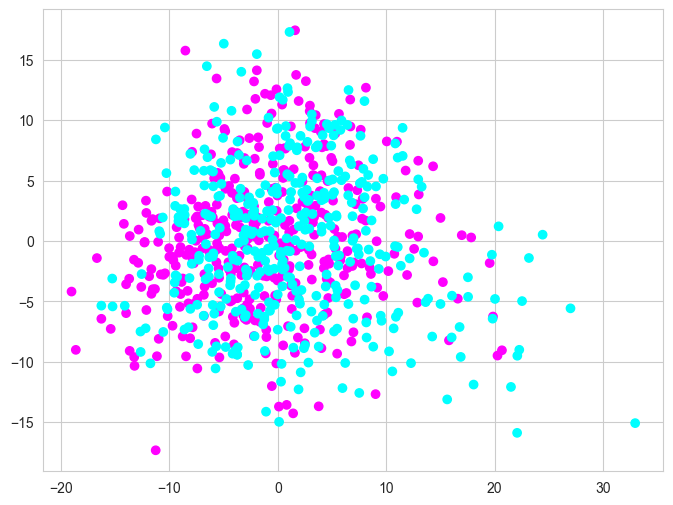

In [66]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['Label'],cmap='cool')

In [67]:
principal_components = pd.DataFrame(data=x_pca , columns=["principal_component_1", "principal_component_2" ])
principal_components

,principal_component_1,principal_component_2
0,-7.323469,1.319718
1,2.690752,3.418008
2,12.166227,0.572934
3,3.061336,3.765446
4,-7.905254,7.383888
...,...,...
790,1.117896,-0.855223
791,6.221006,-10.111898
792,1.610961,0.063313
793,-11.244795,8.414064


In [68]:
features = ['principal_component_1',	'principal_component_2']

In [69]:
pca.components_

array([[ 3.98200715e-02, -1.70987036e-02,  3.26575154e-20, ...,
        -6.41700766e-02, -6.31720552e-02,  1.36328338e-02],
       [-7.11180355e-02, -2.70630568e-02, -5.30689649e-19, ...,
        -5.49927794e-02, -6.76547945e-02, -1.20881286e-02]])

In [70]:
values = pca.explained_variance_ratio_
print ('Variance of each component',values)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component [0.11073967 0.07049115]
Total Variance Explained: 18.12
